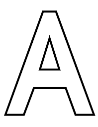

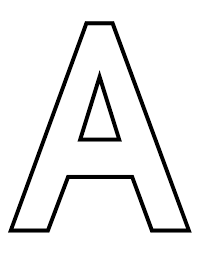

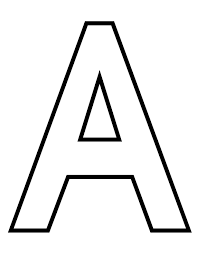

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

# Function to apply various image processing operations
def process_image(image):
    # Resize image
    resized = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)))

    # Convert image to grayscale
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return resized, grayscale

# Path to your RGB image file
image_path = 'Letters.png'

# Check if the file exists
if os.path.exists(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Check if the image was successfully read
    if original_image is not None:
        # Process the image
        resized_image, grayscale_image = process_image(original_image)

        # Display or save the processed images
        cv2_imshow(resized_image)
        cv2_imshow(grayscale_image)
        cv2_imshow(original_image)
        # Save processed images (optional)
        cv2.imwrite('resized_image.jpg', resized_image)
        cv2.imwrite('grayscale_image.jpg', grayscale_image)

        # Wait for a key press and close all windows
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")


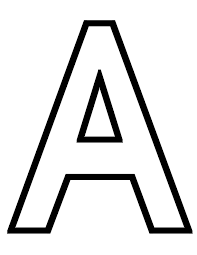

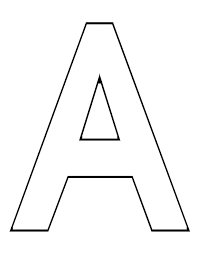

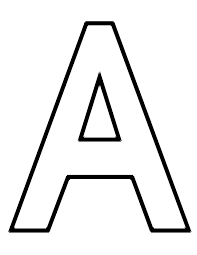

In [ ]:
# Apply minimum filter
min_filtered = cv2.erode(original_image, kernel=np.ones((3,3), np.uint8))

# Apply maximum filter
max_filtered = cv2.dilate(original_image, kernel=np.ones((3,3), np.uint8))

# Apply median filter
median_filtered = cv2.medianBlur(original_image, 3)  # kernel size should be odd

cv2_imshow(min_filtered)
cv2_imshow(max_filtered)
cv2_imshow(median_filtered)

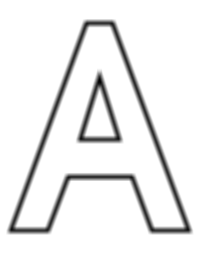

In [ ]:
# Apply averaging filter (simple blur)
average_filtered = cv2.blur(original_image, (5, 5))  # Adjust kernel size as needed
cv2_imshow(average_filtered)

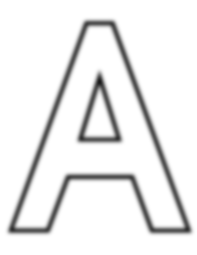

In [ ]:
# Apply weighted averaging filter (Gaussian blur)
weighted_average_filtered = cv2.GaussianBlur(original_image, (11, 11), 0)  # Adjust kernel size as needed
cv2_imshow(weighted_average_filtered)


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np




#averaging

height, width = image.shape[:2]

for i in range(0, int(height/2),2):
  for j in range(0, int(width/2),2):
    resized_image[i, j, :] = (original_image[i*2, j*2,:]+original_image[i*2+1, j*2,:]+original_image[i*2, j*2+1,:]+original_image[i*2+1, j*2+1,:])/4
cv2_imshow(resized_image)




# interleaving

height, width = image.shape[:2]

for i in range(0, int(height/2),2):
  for j in range(0, int(width/2),2):
    resized_image[i, j] = image[i*2, j*2]
cv2_imshow(resized_image)
b=resized_image.shape
print(b)

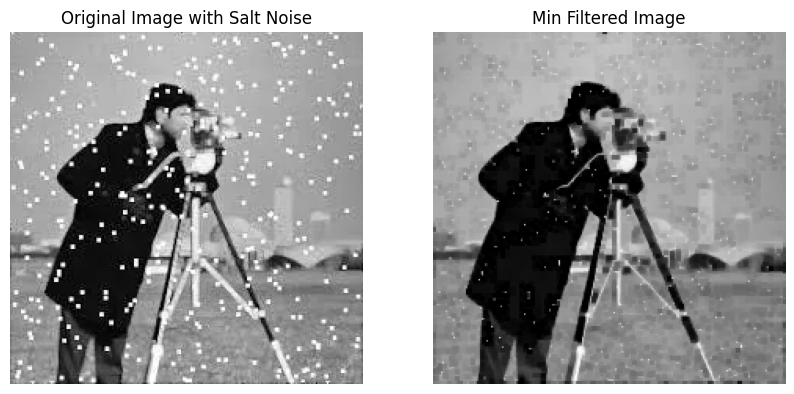

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/salt.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

min_filtered_image = cv2.erode(image, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image with Salt Noise')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Min Filtered Image')
plt.imshow(min_filtered_image, cmap='gray')
plt.axis('off')

plt.show()


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(-0.5, 224.5, 224.5, -0.5)

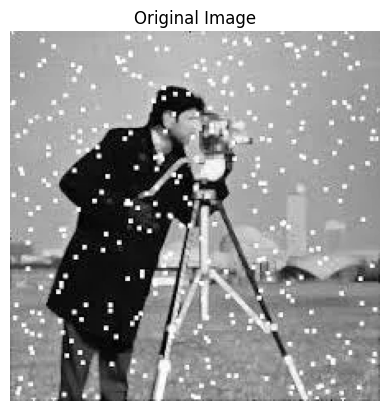

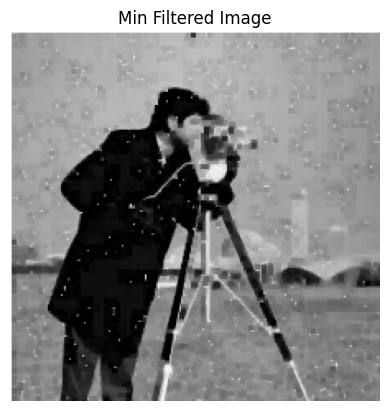

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def min_filter(image, kernel_size=3):
    height, width = image.shape

    filtered_image = np.zeros((height, width), dtype=np.uint8)

    pad_size = kernel_size

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=255)
    print(padded_image)
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            min_value = np.min(neighborhood)
            filtered_image[i, j] = min_value

    return filtered_image
    
image = cv2.imread('/content/salt.jpg', cv2.IMREAD_GRAYSCALE)

min_filtered_image = min_filter(image, kernel_size=3)

plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure()
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')



(760, 526)
(960, 926)


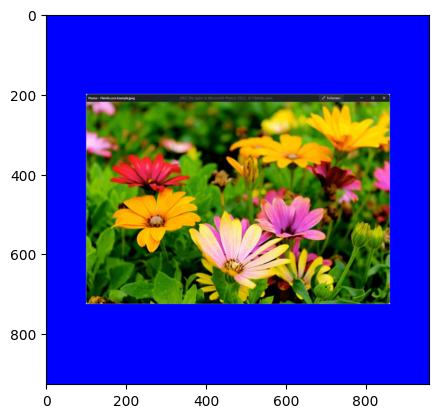

In [ ]:
from PIL import Image, ImageOps

image = Image.open('/content/Flowers.jpg')
print(image.size)
padding = (100, 200, 100, 200)
padded_image = ImageOps.expand(image, padding, fill='blue')

padded_image.show()
padded_image.save('padded_image.jpg')
plt.imshow(padded_image)
print(padded_image.size)


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(-0.5, 759.5, 525.5, -0.5)

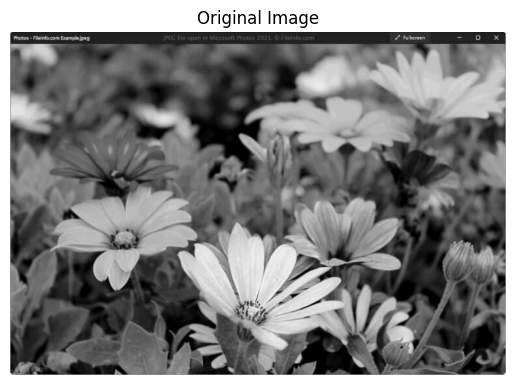

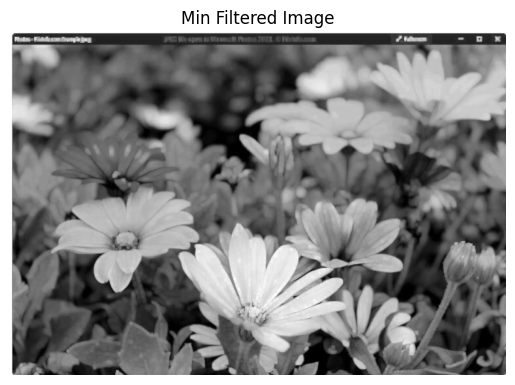

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def min_filter(image, kernel_size=3):
    height, width = image.shape

    filtered_image = np.zeros((height, width), dtype=np.uint8)

    pad_size = kernel_size

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=255)
    print(padded_image)
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            min_value = np.max(neighborhood)
            filtered_image[i, j] = min_value

    return filtered_image

image = cv2.imread('/content/Flowers.jpg', cv2.IMREAD_GRAYSCALE)

min_filtered_image = min_filter(image, kernel_size=3)

plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure()
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')



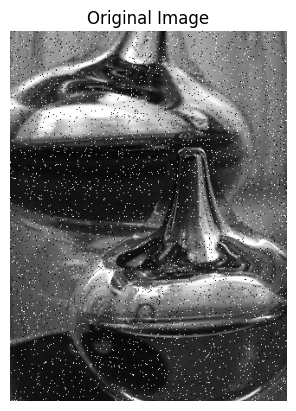

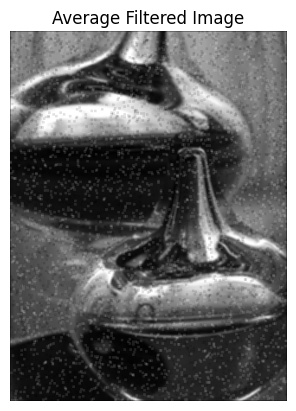

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def average_filter(image, kernel_size=3):
    height, width = image.shape

    filtered_image = np.zeros((height, width), dtype=np.uint8)

    pad_size = kernel_size // 2

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            avg_value = np.mean(neighborhood)
            filtered_image[i, j] = avg_value

    return filtered_image

image = cv2.imread('/content/Noise_salt_and_pepper.png', cv2.IMREAD_GRAYSCALE)

avg_filtered_image = average_filter(image, kernel_size=3)

plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure()
plt.imshow(avg_filtered_image, cmap='gray')
plt.title('Average Filtered Image')
plt.axis('off')

plt.show()


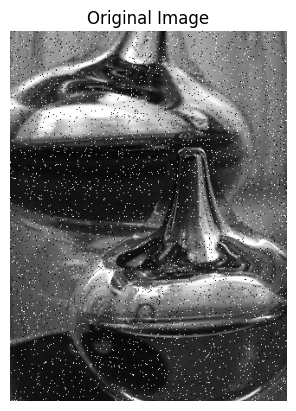

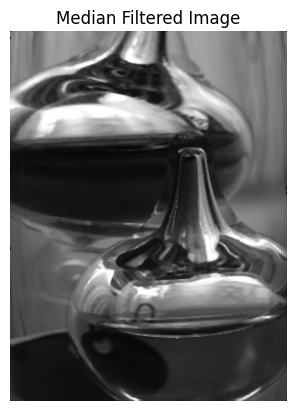

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def median_filter(image, kernel_size=3):
    height, width = image.shape

    filtered_image = np.zeros((height, width), dtype=np.uint8)

    pad_size = kernel_size // 2

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            median_value = np.median(neighborhood)
            filtered_image[i, j] = median_value

    return filtered_image

image = cv2.imread('/content/Noise_salt_and_pepper.png', cv2.IMREAD_GRAYSCALE)

median_filtered_image = median_filter(image, kernel_size=3)

plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure()
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()


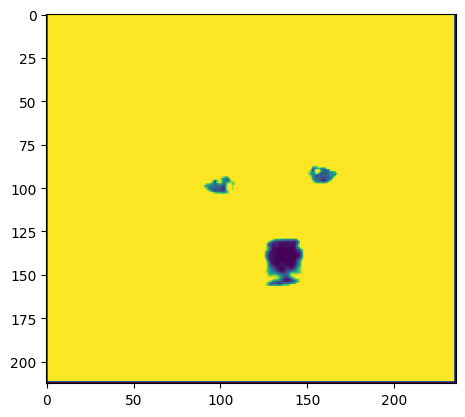

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt # Import matplotlib.pyplot

def apply_laplacian_filter(image):
    # Load image and convert to grayscale
    img = Image.open(image).convert('L')
    img_array = np.array(img)

    # Define the Laplacian kernel
    laplacian_kernel = np.array([[8/9, 8/9, 8/9],
                                [8/9, 8/9, 8/9],
                                [8/9, 8/9, 8/9]])

    # Get image dimensions
    height, width = img_array.shape

    # Create an output array to store the filtered image
    output_array = np.zeros((height, width), dtype=np.float32)

    # Apply the kernel to each pixel in the image
    for i in range(1, height-1):
        for j in range(1, width-1):
            # Extract the 3x3 region around the pixel
            region = img_array[i-1:i+2, j-1:j+2]
            # Compute the convolution
            filtered_value = np.sum(region * laplacian_kernel)
            # Assign the result to the output array
            output_array[i, j] = filtered_value

    # Convert the output array back to an image
    output_array = np.clip(output_array, 0, 255)  # Clip values to be in the valid range
    output_image = Image.fromarray(output_array.astype(np.uint8))

    return output_image

# Example usage
filtered_img = apply_laplacian_filter('/content/image.jpeg')
plt.imshow(filtered_img) # Display the filtered image using matplotlib
plt.show()
filtered_img.show()  # Display the filtered image
filtered_img.save('filtered_image.jpg')  # Save the filtered image

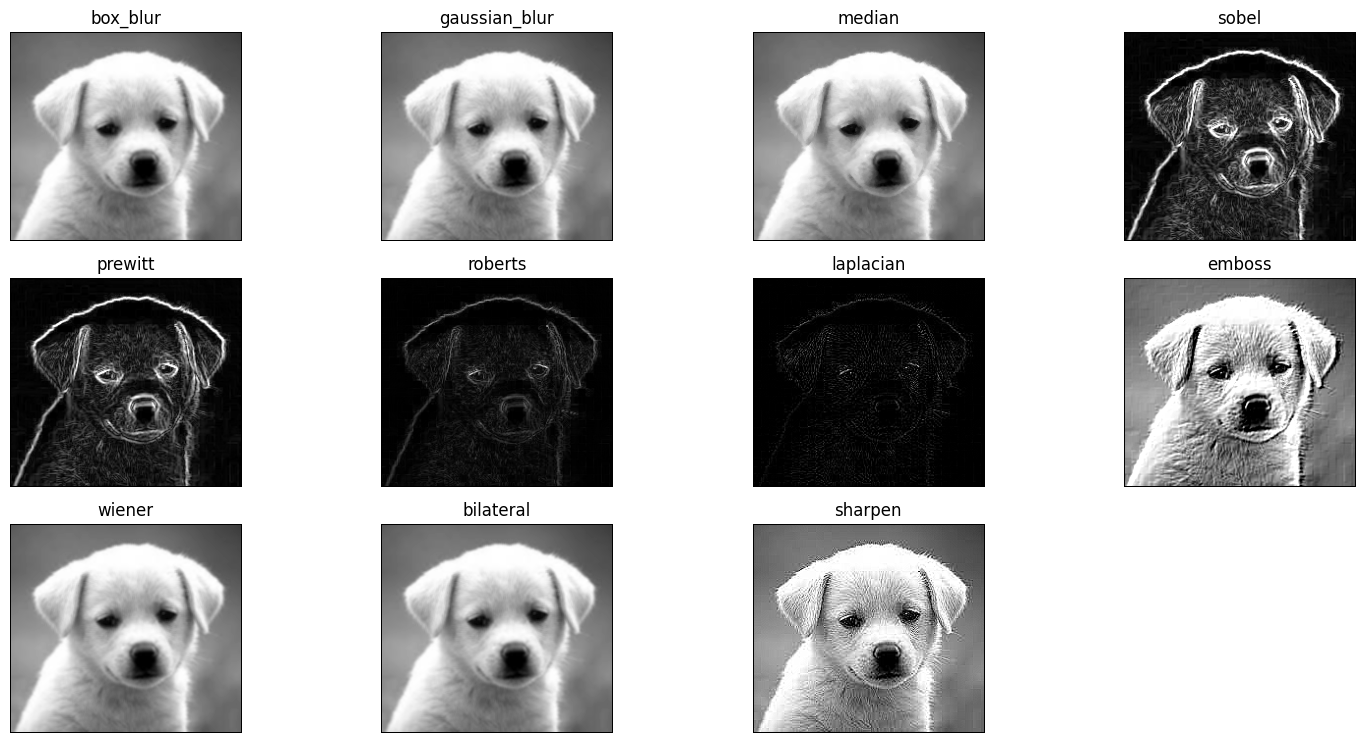

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_filter(img_array, filter_type='box_blur'):
    # Define filters
    if filter_type == 'box_blur':
        kernel = np.ones((3, 3)) / 9
    elif filter_type == 'gaussian_blur':
        kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]]) / 16
    elif filter_type == 'median':
        def median_filter(region):
            return np.median(region)
    elif filter_type == 'sobel':
        sobel_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
        sobel_y = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])
    elif filter_type == 'prewitt':
        prewitt_x = np.array([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]])
        prewitt_y = np.array([[-1, -1, -1],
                              [0, 0, 0],
                              [1, 1, 1]])
    elif filter_type == 'roberts':
        roberts_x = np.array([[1, 0],
                              [0, -1]])
        roberts_y = np.array([[0, 1],
                              [-1, 0]])
    elif filter_type == 'laplacian':
        kernel = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]])
    elif filter_type == 'emboss':
        kernel = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
    elif filter_type == 'wiener':
        kernel = np.ones((3, 3)) / 9
        noise_var = 0.1
    elif filter_type == 'bilateral':
        kernel = np.ones((3, 3)) / 9
    elif filter_type == 'histogram_equalization':
        pass
    elif filter_type == 'clahe':
        pass
    elif filter_type == 'sharpen':
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
    else:
        raise ValueError(f"Filter type '{filter_type}' not recognized")

    # Apply the filter
    height, width = img_array.shape
    output_array = np.zeros((height, width), dtype=np.float32)

    for i in range(1, height-1):
        for j in range(1, width-1):
            region = img_array[i-1:i+2, j-1:j+2]
            if filter_type == 'median':
                output_array[i, j] = median_filter(region)
            elif filter_type == 'sobel':
                gx = np.sum(region * sobel_x)
                gy = np.sum(region * sobel_y)
                output_array[i, j] = np.hypot(gx, gy)
            elif filter_type == 'prewitt':
                gx = np.sum(region * prewitt_x)
                gy = np.sum(region * prewitt_y)
                output_array[i, j] = np.hypot(gx, gy)
            elif filter_type == 'roberts':
                gx = np.sum(region[:2, :2] * roberts_x)
                gy = np.sum(region[:2, :2] * roberts_y)
                output_array[i, j] = np.hypot(gx, gy)
            else:
                output_array[i, j] = np.sum(region * kernel)

    output_array = np.clip(output_array, 0, 255)

    return output_array.astype(np.uint8)

def main(image_path):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img, dtype=np.float32)

    filter_types = ['box_blur', 'gaussian_blur', 'median', 'sobel', 'prewitt',
                    'roberts', 'laplacian', 'emboss', 'wiener', 'bilateral', 'sharpen']
    images = []

    for filter_type in filter_types:
        filtered_array = apply_filter(img_array, filter_type)
        filtered_image = Image.fromarray(filtered_array)
        images.append((filter_type, filtered_image))

    plt.figure(figsize=(15, 10))
    for i, (filter_type, image) in enumerate(images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(filter_type)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

main('/content/kuttaop.jpeg')


Original Height: 526
Original Width: 760
New Height after zooming: 6312
New Width after zooming: 9120


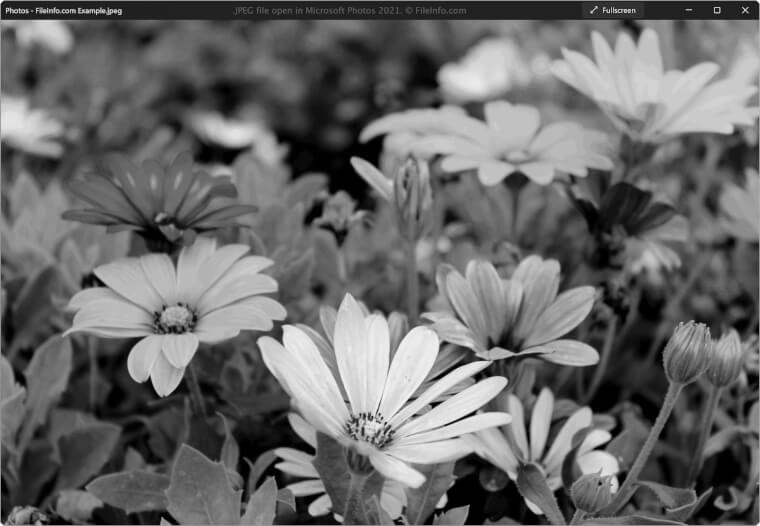

In [2]:
import cv2
import numpy as np

def zoom_image(image, zoom_factor=2):
    original_height, original_width = image.shape[:2]
    print(f"Original Height: {original_height}")
    print(f"Original Width: {original_width}")
    new_height = original_height * zoom_factor
    new_width = original_width * zoom_factor
    print(f"New Height after zooming: {new_height}")
    print(f"New Width after zooming: {new_width}")
    zoomed_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(original_height):
        for j in range(original_width):
            new_i = zoom_factor * i
            new_j = zoom_factor * j

            for m in range(zoom_factor):
                for n in range(zoom_factor):
                    zoomed_image[new_i + m, new_j + n] = image[i, j]

    return zoomed_image

input_image = cv2.imread("/content/Flowers.jpg")

if input_image is None:
    print("Error: Image not found or could not be loaded.")
else:
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    output_image = zoom_image(grayscale_image, zoom_factor=12)
    cv2.imwrite('/content/zoomed_image.jpg', output_image)
    from google.colab.patches import cv2_imshow
    cv2_imshow(output_image)
    cv2_imshow(grayscale_image)


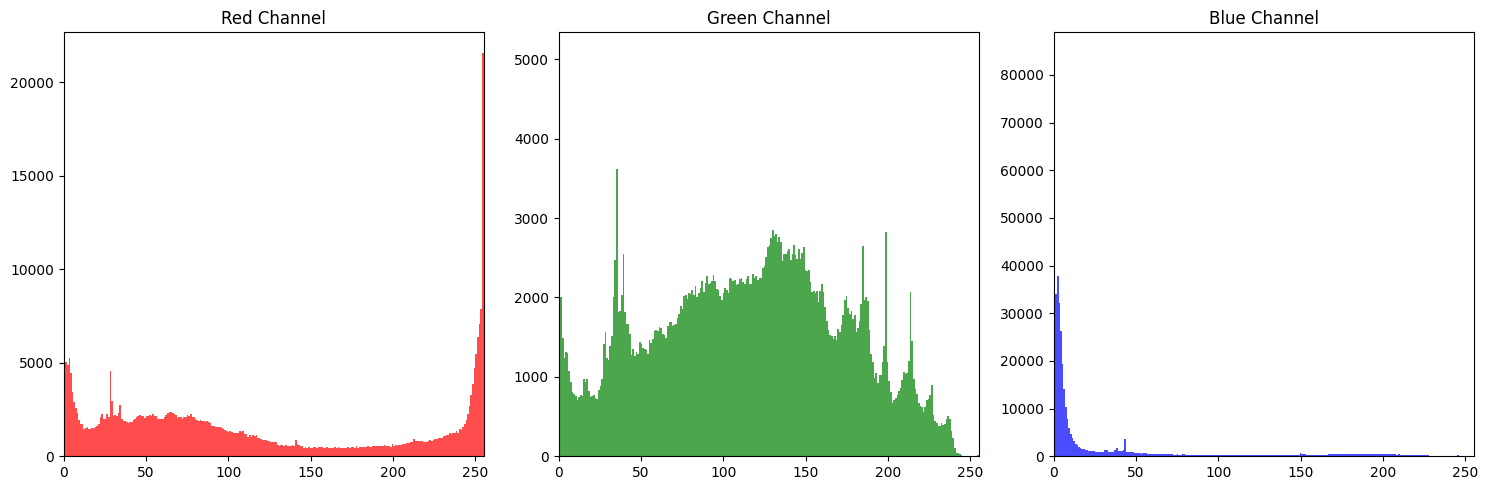

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot_rgb_histogram(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)

    red_channel = img_array[:, :, 0]
    green_channel = img_array[:, :, 1]
    blue_channel = img_array[:, :, 2]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7)
    plt.title('Red Channel')
    plt.xlim(0, 255)

    plt.subplot(1, 3, 2)
    plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.7)
    plt.title('Green Channel')
    plt.xlim(0, 255)

    plt.subplot(1, 3, 3)
    plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Blue Channel')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

plot_rgb_histogram('/content/Flowers.jpg')


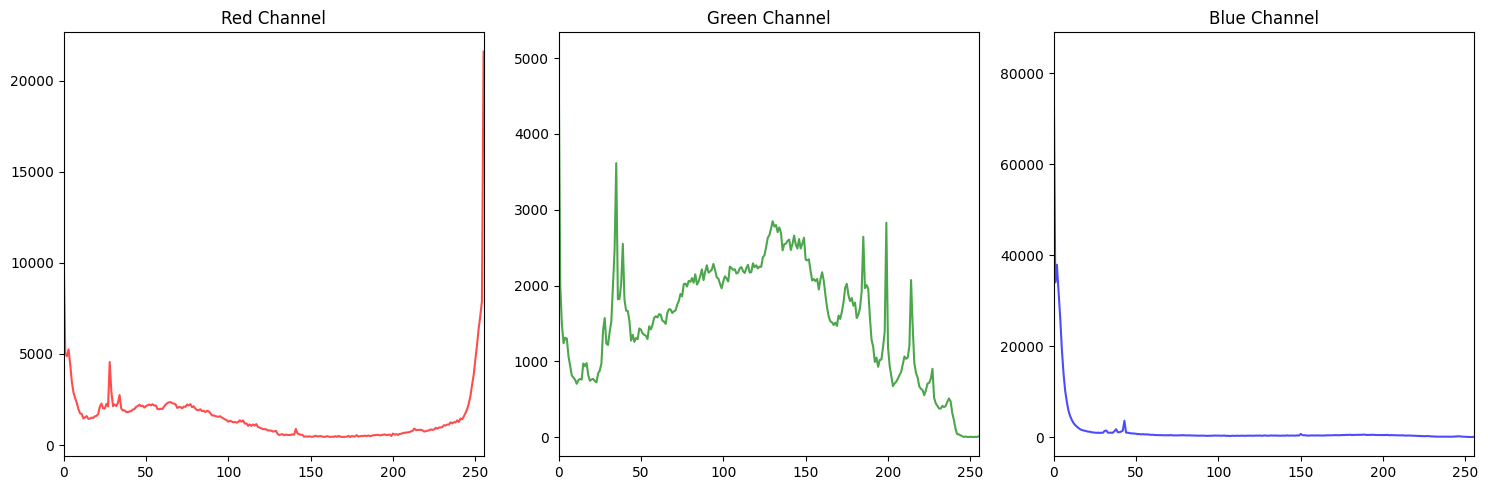

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot_rgb_histogram_without_hist(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)

    red_channel = img_array[:, :, 0].ravel()
    green_channel = img_array[:, :, 1].ravel()
    blue_channel = img_array[:, :, 2].ravel()

    red_histogram = np.zeros(256)
    green_histogram = np.zeros(256)
    blue_histogram = np.zeros(256)

    for value in red_channel:
        red_histogram[value] += 1

    for value in green_channel:
        green_histogram[value] += 1

    for value in blue_channel:
        blue_histogram[value] += 1

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(red_histogram, color='red', alpha=0.7)
    plt.title('Red Channel')
    plt.xlim(0, 255)

    plt.subplot(1, 3, 2)
    plt.plot(green_histogram, color='green', alpha=0.7)
    plt.title('Green Channel')
    plt.xlim(0, 255)

    plt.subplot(1, 3, 3)
    plt.plot(blue_histogram, color='blue', alpha=0.7)
    plt.title('Blue Channel')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

# Example usage
plot_rgb_histogram_without_hist('/content/Flowers.jpg')


Equalized image saved to: /content/Flowerssss.jpg


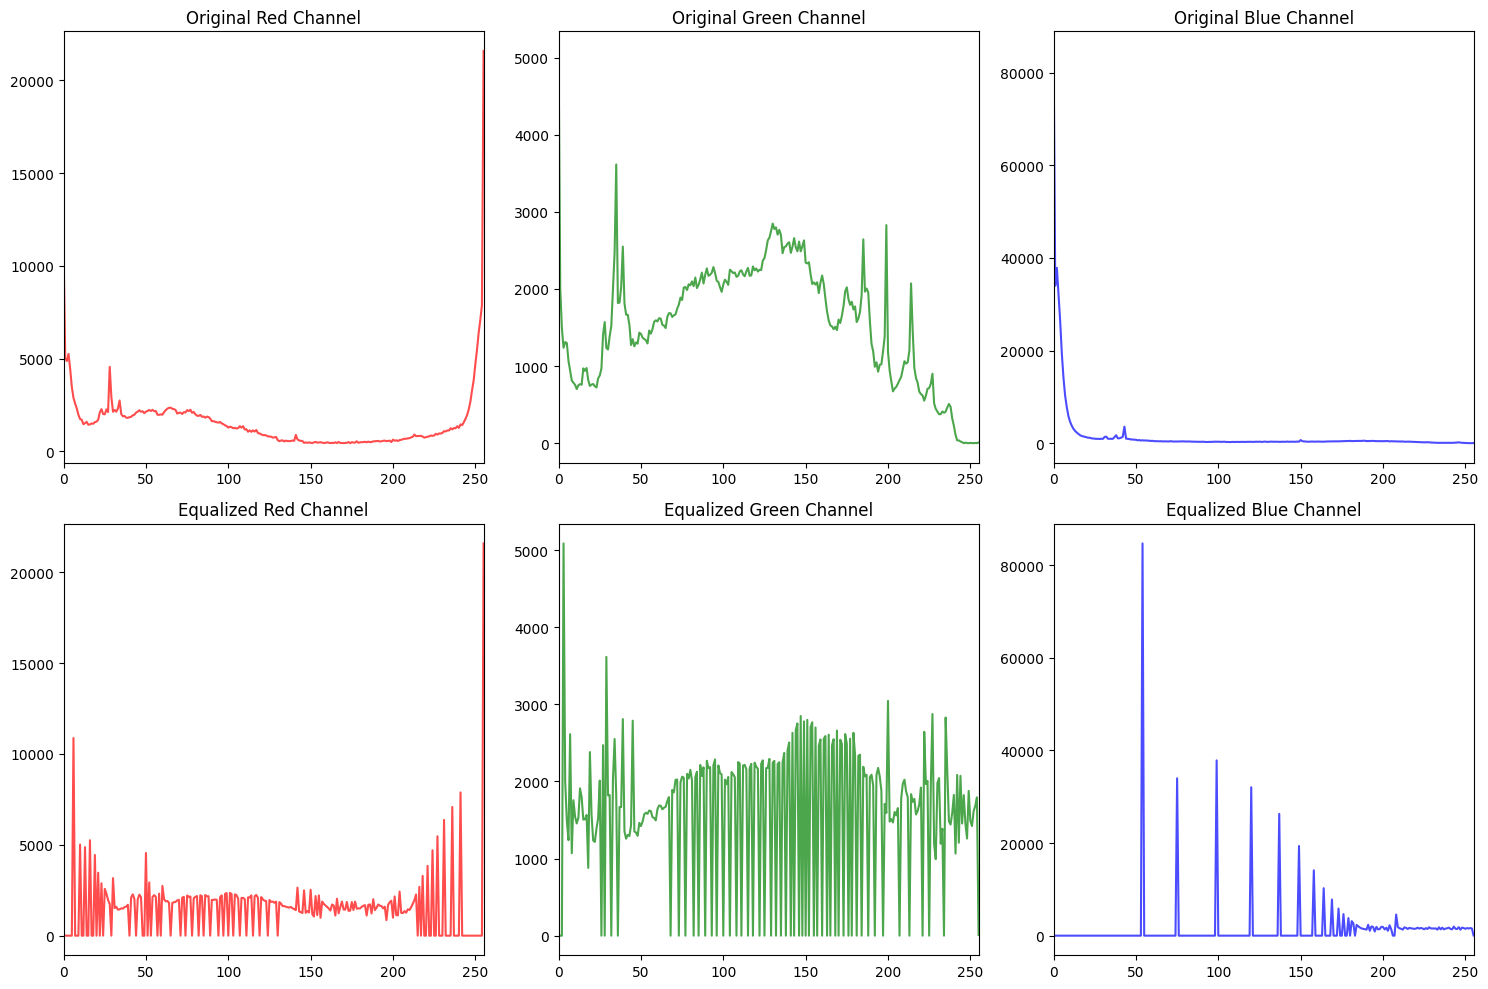

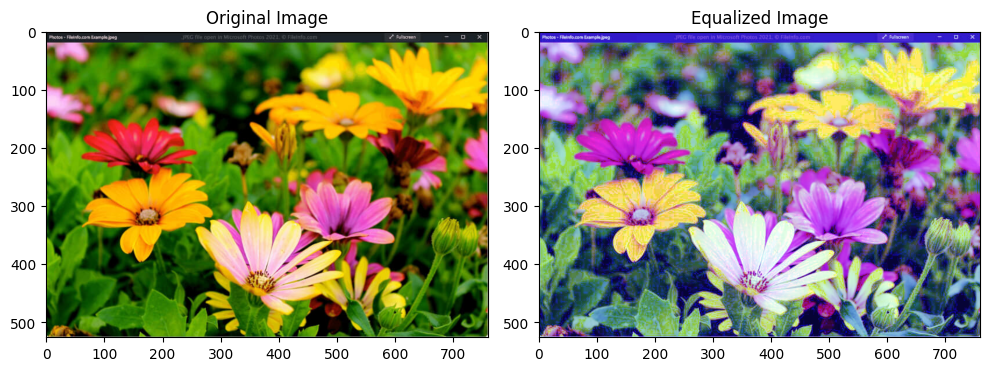

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def equalize_histogram(channel):
    histogram = np.zeros(256)
    for value in channel:
        histogram[value] += 1

    cdf = np.cumsum(histogram)
    cdf_normalized = cdf * 255 / cdf[-1]

    equalized_channel = np.interp(channel, range(0, 256), cdf_normalized)

    return equalized_channel.astype(np.uint8)

def plot_rgb_histogram_and_equalized(image_path, save_path=None):
    img = Image.open(image_path)
    img_array = np.array(img)

    red_channel = img_array[:, :, 0].ravel()
    green_channel = img_array[:, :, 1].ravel()
    blue_channel = img_array[:, :, 2].ravel()

    equalized_red = equalize_histogram(red_channel)
    equalized_green = equalize_histogram(green_channel)
    equalized_blue = equalize_histogram(blue_channel)

    equalized_img_array = np.stack([
        equalized_red.reshape(img_array.shape[0], img_array.shape[1]),
        equalized_green.reshape(img_array.shape[0], img_array.shape[1]),
        equalized_blue.reshape(img_array.shape[0], img_array.shape[1])
    ], axis=2)

    equalized_img = Image.fromarray(equalized_img_array)

    if save_path is not None:
        equalized_img.save(save_path)
        print(f'Equalized image saved to: {save_path}')

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.plot(np.histogram(red_channel, bins=256, range=(0, 255))[0], color='red', alpha=0.7)
    plt.title('Original Red Channel')
    plt.xlim(0, 255)

    plt.subplot(2, 3, 2)
    plt.plot(np.histogram(green_channel, bins=256, range=(0, 255))[0], color='green', alpha=0.7)
    plt.title('Original Green Channel')
    plt.xlim(0, 255)

    plt.subplot(2, 3, 3)
    plt.plot(np.histogram(blue_channel, bins=256, range=(0, 255))[0], color='blue', alpha=0.7)
    plt.title('Original Blue Channel')
    plt.xlim(0, 255)

    plt.subplot(2, 3, 4)
    plt.plot(np.histogram(equalized_red, bins=256, range=(0, 255))[0], color='red', alpha=0.7)
    plt.title('Equalized Red Channel')
    plt.xlim(0, 255)

    plt.subplot(2, 3, 5)
    plt.plot(np.histogram(equalized_green, bins=256, range=(0, 255))[0], color='green', alpha=0.7)
    plt.title('Equalized Green Channel')
    plt.xlim(0, 255)

    plt.subplot(2, 3, 6)
    plt.plot(np.histogram(equalized_blue, bins=256, range=(0, 255))[0], color='blue', alpha=0.7)
    plt.title('Equalized Blue Channel')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_img)
    plt.title('Equalized Image')

    plt.tight_layout()
    plt.show()

plot_rgb_histogram_and_equalized('/content/Flowers.jpg', save_path='/content/Flowerssss.jpg')


Equalized image saved to: /content/greyscale.jpg


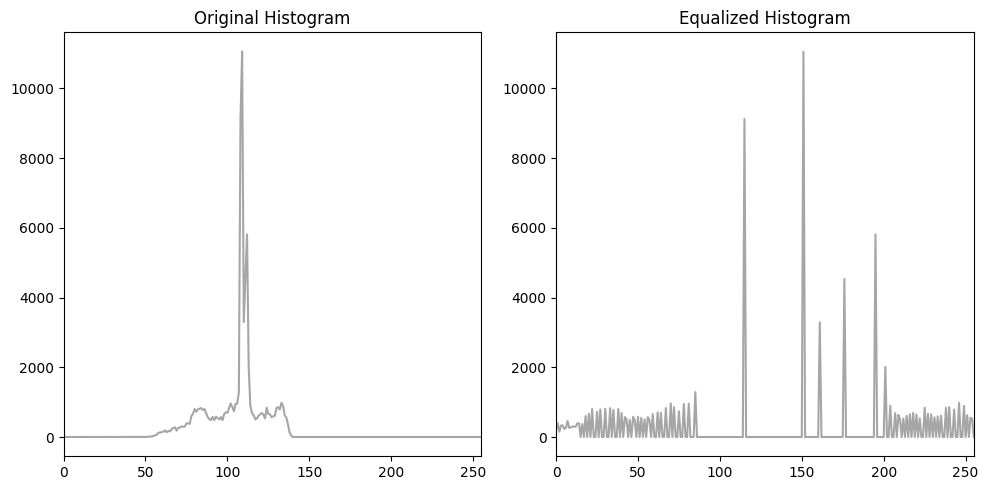

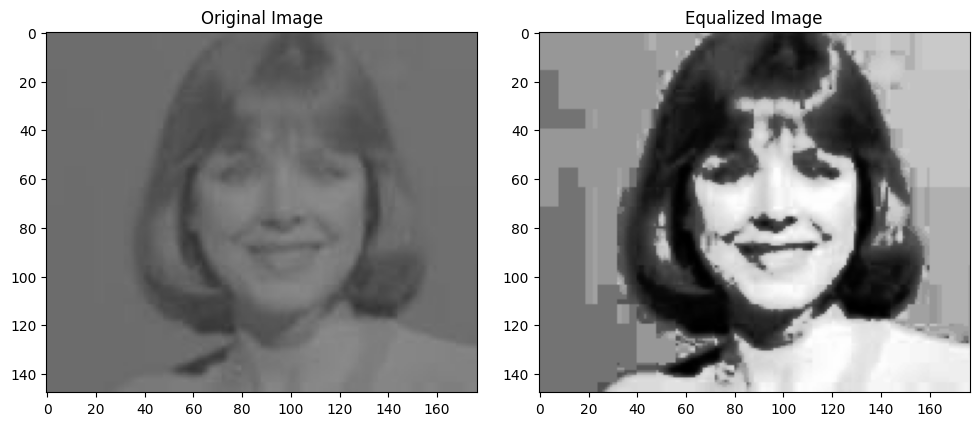

In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def equalize_histogram_grayscale(channel):
    histogram = np.zeros(256)
    for value in channel:
        histogram[value] += 1

    cdf = np.cumsum(histogram)
    cdf_normalized = cdf * 255 / cdf[-1]

    equalized_channel = np.interp(channel, range(0, 256), cdf_normalized)

    return equalized_channel.astype(np.uint8)

def plot_grayscale_histogram_and_equalized(image_path, save_path=None):
    img = Image.open(image_path)
    img_array = np.array(img)

    channel = img_array.ravel()

    equalized_channel = equalize_histogram_grayscale(channel)

    equalized_img_array = equalized_channel.reshape(img_array.shape)

    equalized_img = Image.fromarray(equalized_img_array)

    if save_path is not None:
        equalized_img.save(save_path)
        print(f'Equalized image saved to: {save_path}')

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(np.histogram(channel, bins=256, range=(0, 255))[0], color='gray', alpha=0.7)
    plt.title('Original Histogram')
    plt.xlim(0, 255)

    plt.subplot(1, 2, 2)
    plt.plot(np.histogram(equalized_channel, bins=256, range=(0, 255))[0], color='gray', alpha=0.7)
    plt.title('Equalized Histogram')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Equalized Image')

    plt.tight_layout()
    plt.show()

plot_grayscale_histogram_and_equalized('/content/equalisation.jpeg', save_path='/content/greyscale.jpg')


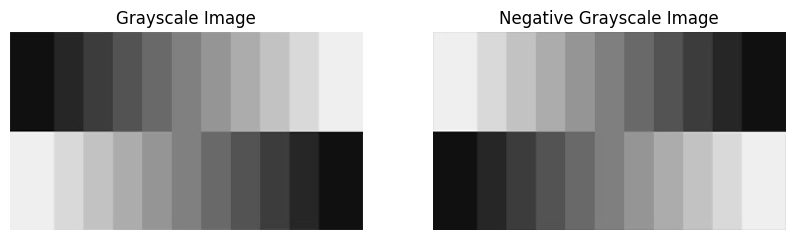

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/bap.jpeg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load image.")
else:

    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Grayscale Image')
    plt.imshow(grayscale_image, cmap='gray')
    plt.axis('off')

    grayscale_image_neg = 255 - grayscale_image

    plt.subplot(1, 2, 2)
    plt.title('Negative Grayscale Image')
    plt.imshow(grayscale_image_neg, cmap='gray')
    plt.axis('off')

    plt.show()


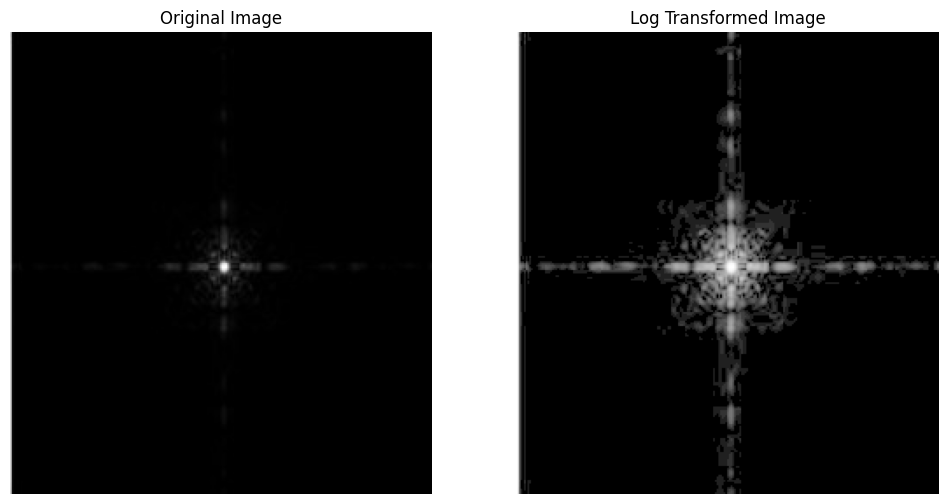

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/log.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_float = np.float32(image)


c = 255 / np.log(1 + np.max(image_float))
log_transformed = c* np.log(1 + image_float)

log_transformed = np.uint8(log_transformed)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(log_transformed, cmap='gray')
plt.axis('off')

plt.show()


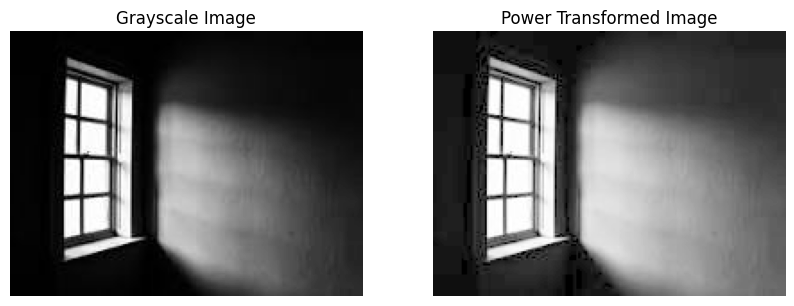

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image_path = '/content/gamma.jpeg'
image = cv2.imread(image_path)

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

normalized_image = grayscale_image / 255.0

power_transformed = 1 * (normalized_image ** 0.5)

power_transformed = np.clip(power_transformed * 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Power Transformed Image')
plt.imshow(power_transformed, cmap='gray')
plt.axis('off')

plt.show()

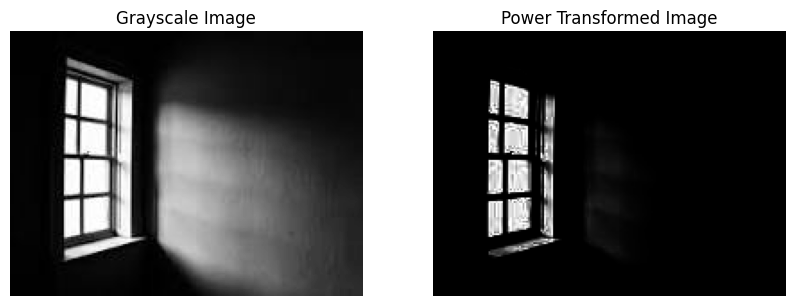

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image_path = '/content/gamma.jpeg'
image = cv2.imread(image_path)

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

normalized_image = grayscale_image / 255.0

power_transformed = 1 * (normalized_image ** 10)

power_transformed = np.clip(power_transformed * 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Power Transformed Image')
plt.imshow(power_transformed, cmap='gray')
plt.axis('off')

plt.show()

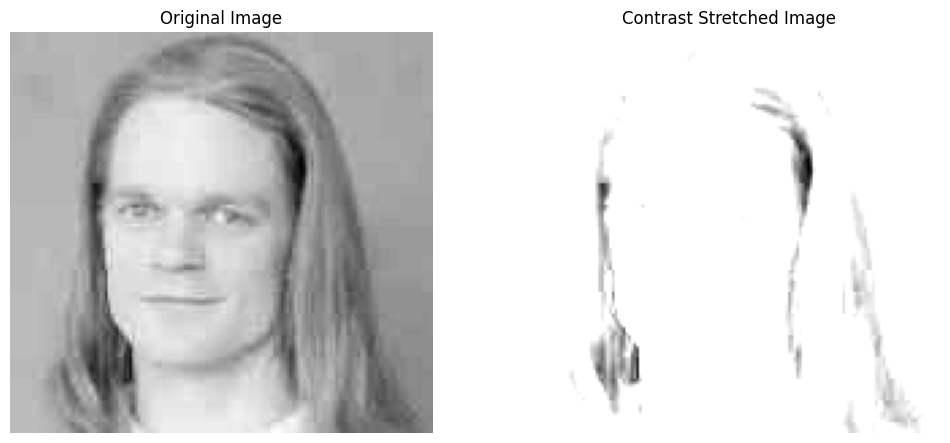

True

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image):
    img_float = image.astype(np.float32)

    min_val = 100
    max_val = 200

    stretched = (img_float - min_val) * 255 / (max_val - min_val)

    stretched = np.clip(stretched, 0, 255).astype(np.uint8)

    return stretched

image_path = '/content/low_contrast.jpeg'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

stretched_img = contrast_stretching(img)

# Plotting the images
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.show()

# Save the contrast stretched image
cv2.imwrite('/content/contrast_stretched_image.jpg', stretched_img)
